## Modelling

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats

In [3]:
from google.colab  import files
uploaded2 = files.upload()

Saving drg1.xlsx to drg1.xlsx


In [5]:
import pandas as pd
import io
  
df7= pd.read_excel(io.BytesIO(uploaded2["drg1.xlsx"]))


# Vader Lexicon for sentiment score

In [6]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [7]:
df7['Sentiment'] = (df7['Reviews'].apply(lambda review: sid.polarity_scores(str(review))['compound'])
                  ).apply(lambda c: 'Positive' if c >0 else 'Not Positive')

In [8]:
df=df7.dropna()

In [9]:
df.head()

,Condition,Age,Sex,Drug,EaseofUse,Effectiveness,Satisfaction,Reviews,Sides,Sentiment
0,"""Change of Life"" Signs",13-18,Female,celexa,4.00,1.75,1.25,i really dont like this antidepressant it give...,"Nausea , dry mouth , loss of appetite, tiredn...",Not Positive
1,"""Change of Life"" Signs",13-18,Female,citalopram hbr,3.50,3.00,2.00,",i think it made my memory worse but that cou...","Nausea , dry mouth , loss of appetite, tiredn...",Not Positive
2,"""Change of Life"" Signs",13-18,Female,clonidine hcl,3.25,3.00,2.25,doctor prescribed this for my anxiety disorder...,"Dizziness , lightheadedness , drowsiness, dr...",Positive
3,"""Change of Life"" Signs",13-18,Female,clonidine hcl er,3.25,3.00,2.25,doctor prescribed this for my anxiety disorder...,"Dizziness , lightheadedness , drowsiness, tir...",Positive
4,"""Change of Life"" Signs",13-18,Female,estrogen-methyltestosterone,5.00,4.00,5.00,sunshine sunshine ladybugs away clap your hove...,"Dizziness , lightheadedness , headache , st...",Positive


In [10]:
df['Reviews']=df['Reviews'].astype('str')

In [ ]:
df.tail()

,Condition,Drug,Age,Sex,EaseofUse,Effectiveness,Satisfaction,Reviews,Sides,Sentiment
99043,neurotrophic keratitis,oxervate drops,55-64,Female,3,3,1,iã¢m on week and the pain from light sensitiv...,"Eye discomfort, pain, redness, watery eyes ,...",Not Positive
99044,osteoporosis in postmenopausal woman at high r...,tymlos pen injector,55-64,Female,5,1,1,itâ€™s easy to do but no where on the side eff...,Dizziness or fast heartbeat may occur within ...,Not Positive
99045,osteoporosis in postmenopausal woman at high r...,tymlos pen injector,55-64,Female,5,5,4,i do have about a two hour increase in heart r...,Dizziness or fast heartbeat may occur within ...,Positive
99046,seborrheic dermatitis of scalp,ciclopirox shampoo,65-74,Male,4,3,2,worked for a while slowly started to work less...,"Burning, redness, or itching at the applicat...",Not Positive
99047,seborrheic dermatitis of scalp,"ciclopirox solution, non-",65-74,Male,4,3,2,worked for a while slowly started to work less...,Redness/burning of treated skin or changes i...,Not Positive


In [11]:
df.Reviews[0]

'i really dont like this antidepressant it gives me bad headaches but helps with the mood swings and the irritation,i took celexa for severe pms symptoms i felt fine during my cycle but afterwards my normal period symptoms intisified so i decided to stop taking it i experienced awful withdrawal symptoms for about a week and a half dramamine and fruit helped ease my nausea also if you are experiencing bad withdrawal symptoms be careful what pain killers you use for headaches tylenol made me get sick  also naps helped alot so if you have the opportunity to rest do it and know that it will go away ,i took this medication for depressionptsdand anxiety and it only took  days and i was having severe suicidal thoughts and tendencys ,i feel like it didnt work'

In [12]:
df.shape

(58860, 10)

#  Logistic Regression model

In [13]:
!pip install Pipeline
!pip install pipeline

In [14]:
    #def slog(rev2):
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
    tfidf_v=TfidfVectorizer()
    X=df.Reviews
    y=df.Sentiment
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=365)
    model= Pipeline([('tfidf', TfidfVectorizer()),
                         ('log', LogisticRegression(penalty='l2',multi_class='auto',class_weight = 'balanced',solver = 'liblinear',intercept_scaling=.005)),])
        
    model.fit(X_train,y_train)
    y_testpred=model.predict(X_test)
    y_trainpred=model.predict(X_train)
    #return model.predict(rev2['COl'])


In [15]:
y_testpred

array(['Positive', 'Not Positive', 'Not Positive', ..., 'Not Positive',
       'Not Positive', 'Not Positive'], dtype=object)

In [16]:
df['Prediction'] = model.predict(X)

In [17]:
df.head(5)


,Condition,Age,Sex,Drug,EaseofUse,Effectiveness,Satisfaction,Reviews,Sides,Sentiment,Prediction
0,"""Change of Life"" Signs",13-18,Female,celexa,4.00,1.75,1.25,i really dont like this antidepressant it give...,"Nausea , dry mouth , loss of appetite, tiredn...",Not Positive,Not Positive
1,"""Change of Life"" Signs",13-18,Female,citalopram hbr,3.50,3.00,2.00,",i think it made my memory worse but that cou...","Nausea , dry mouth , loss of appetite, tiredn...",Not Positive,Not Positive
2,"""Change of Life"" Signs",13-18,Female,clonidine hcl,3.25,3.00,2.25,doctor prescribed this for my anxiety disorder...,"Dizziness , lightheadedness , drowsiness, dr...",Positive,Not Positive
3,"""Change of Life"" Signs",13-18,Female,clonidine hcl er,3.25,3.00,2.25,doctor prescribed this for my anxiety disorder...,"Dizziness , lightheadedness , drowsiness, tir...",Positive,Not Positive
4,"""Change of Life"" Signs",13-18,Female,estrogen-methyltestosterone,5.00,4.00,5.00,sunshine sunshine ladybugs away clap your hove...,"Dizziness , lightheadedness , headache , st...",Positive,Positive


In [18]:
dg = df.groupby(['Condition','Age', 'Sex','Drug'], group_keys=False).apply(lambda x: x.sample(min(len(x), 20)))

In [19]:
dg.head

<bound method NDFrame.head of                             Condition    Age  ...     Sentiment    Prediction
0              "Change of Life" Signs  13-18  ...  Not Positive  Not Positive
1              "Change of Life" Signs  13-18  ...  Not Positive  Not Positive
2              "Change of Life" Signs  13-18  ...      Positive  Not Positive
3              "Change of Life" Signs  13-18  ...      Positive  Not Positive
4              "Change of Life" Signs  13-18  ...      Positive      Positive
...                               ...    ...  ...           ...           ...
58855  seborrheic dermatitis of scalp  65-74  ...  Not Positive  Not Positive
58856  seborrheic dermatitis of scalp  65-74  ...  Not Positive  Not Positive
58857  seborrheic dermatitis of scalp  65-74  ...  Not Positive  Not Positive
58858  seborrheic dermatitis of scalp  65-74  ...  Not Positive  Not Positive
58859  seborrheic dermatitis of scalp  65-74  ...  Not Positive  Not Positive

[58860 rows x 11 columns]>

In [23]:
from google.colab import files
dg.to_excel('Deploy_Project.xlsx')

In [24]:
files.download('Deployproject_Data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('accuracy on train set %s' % accuracy_score(y_train, y_trainpred))
print('accuracy on test set %s' % accuracy_score(y_test, y_testpred))
print("*******************************************************")
print(classification_report(y_test,y_testpred))
print(confusion_matrix(y_test,y_testpred))
  

accuracy on train set 0.890904972250538
accuracy on test set 0.8464152225620115
*******************************************************
              precision    recall  f1-score   support

Not Positive       0.92      0.84      0.88      9587
    Positive       0.74      0.85      0.80      5128

    accuracy                           0.85     14715
   macro avg       0.83      0.85      0.84     14715
weighted avg       0.86      0.85      0.85     14715

[[8072 1515]
 [ 745 4383]]


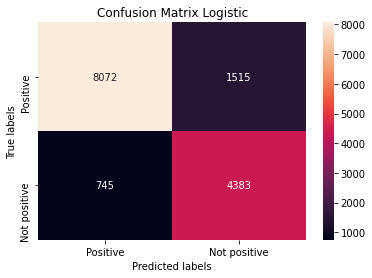

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_testpred)
ax= plt.subplot()
sns.heatmap(cm1,annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Logistic')
ax.xaxis.set_ticklabels(['Positive', 'Not positive']); ax.yaxis.set_ticklabels(['Positive', 'Not positive']);

# Multinomial Naive Bayes

In [ ]:
    #def mnbf(rev2):
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
    tfidf_v=TfidfVectorizer()
    X=df.Reviews
    y=df.Sentiment
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=365)
    modelmnb=Pipeline([('tfidf', TfidfVectorizer()),
                         ('mnb', MultinomialNB()),])    
    modelmnb.fit(X_train,y_train)
    y_testpredm=modelmnb.predict(X_test)
    y_trainpredm=modelmnb.predict(X_train)
    #return modelmnb.predict(rev2['COl'])

In [ ]:
print('accuracy on train set %s' % accuracy_score(y_train, y_trainpredm))
print('accuracy on test set %s' % accuracy_score(y_test, y_testpredm))
print("*******************************************************")
print(classification_report(y_test,y_testpredm))
print(confusion_matrix(y_test,y_testpredm))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_testpredm)
ax= plt.subplot()
sns.heatmap(cm3,annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Navie Bayes'); 
ax.xaxis.set_ticklabels(['Positive', 'Not positive']); ax.yaxis.set_ticklabels(['Positive', 'Not positive']);


# Decision tree

In [ ]:
    #def  dt(rev2):
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.model_selection import train_test_split
    from sklearn.tree import  DecisionTreeClassifier
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
    tfidf_v=TfidfVectorizer()
    X=df.Reviews
    y=df.Sentiment
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=365)
   
    modeltree =Pipeline([('tfidf', TfidfVectorizer()),('decisiontree', DecisionTreeClassifier(criterion = 'entropy',max_depth=3))])
    modeltree.fit(X_train,y_train)
    y_testpredtr=modeltree.predict(X_test)
    y_trainpredtr=modeltree.predict(X_train)
    #return modeltree.predict(rev2['COl'])

In [ ]:
print('accuracy on train set %s' % accuracy_score(y_train, y_trainpredtr))
print('accuracy on test set %s' % accuracy_score(y_test, y_testpredtr))
print("*******************************************************")
print(classification_report(y_test,y_testpredtr))
print(confusion_matrix(y_test,y_testpredtr))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_testpredtr)
ax= plt.subplot()
sns.heatmap(cm4,annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predbbicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Decision tree'); 
ax.xaxis.set_ticklabels(['Positive', 'Not positive']); ax.yaxis.set_ticklabels(['Positive', 'Not positive']);


# Linear SVC Model

In [ ]:
    #def  svcf(rev2):
    from sklearn.svm import LinearSVC
    from sklearn.pipeline import Pipeline
    from sklearn.metrics import accuracy_score, confusion_matrix
    tfidf_v=TfidfVectorizer()
    Xsvc=df.Reviews
    ysvc=df.Sentiment
    X_train, X_test, y_train, y_test = train_test_split(Xsvc, ysvc, test_size=0.25, random_state=365)

    modelsvc= Pipeline([('tfidf', TfidfVectorizer()),
                     ('svc', LinearSVC()),])
    modelsvc.fit(X_train, y_train)
    #return modelsvc.predict(rev2['COl'])
    
    

In [ ]:
y_testpredsvc=modelsvc.predict(X_test)
y_trainpredsvc=modelsvc.predict(X_train)
print('accuracy on train set %s' % accuracy_score(y_train, y_trainpredsvc))
print('accuracy on test set %s' % accuracy_score(y_test,y_testpredsvc))
report = classification_report(y_test, y_testpredsvc)
print('Classification Report  regression: \n', report)
print(confusion_matrix(y_testpredsvc,y_test))
   

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_testpredsvc)
ax= plt.subplot()
sns.heatmap(cm5,annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('SVC Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Not positive']); ax.yaxis.set_ticklabels(['Positive', 'Not positive']);

In [ ]:
log_train=(model.score(X_train,y_train))*100
mnb_train=(modelmnb.score(X_train,y_train))*100
lsvc_train=(modelsvc.score(X_train,y_train))*100
dtree_train=(modeltree.score(X_train,y_train))*100
print("log_train= ",log_train,"\n mnb_train=",mnb_train,"\nlsvc_train=,",lsvc_train,"\n dtree_train=",dtree_train)

In [ ]:
log_test=(model.score(X_test,y_test))*100
mnb_test=(modelmnb.score(X_test,y_test))*100
lsvc_test=(modelsvc.score(X_test,y_test))*100
dtree_test=(modeltree.score(X_test,y_test))*100
print("log_test= ",log_test,"\n mnb_test=",mnb_test,"\nlsvc_test= ",lsvc_test,"\n dtree_test=",dtree_test)

In [ ]:
data= ["very bad review cannot accept worst experience which i never had. going mad migrane headache suffering severe heart problem, feeling to commit suicide"]
rev = pd.DataFrame(data, columns = ['COl'])
rev

In [ ]:
slog(rev)

In [ ]:
svcf(rev)

In [ ]:
mnbf(rev)

In [ ]:
dt(rev)

In [ ]:
data1= ["This is an excellent drug with great satisfaction,there is no side effect. it is very effective "]
rev2 = pd.DataFrame(data1, columns = ['COl'])
rev2

In [ ]:
svcf(rev2)

In [ ]:
slog(rev2)

In [ ]:
mnbf(rev2)

In [ ]:
dt(rev2)

In [ ]:
# medicines from cond

def get_med():
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline
    from sklearn import metrics
    from sklearn.svm import LinearSVC


    Xx = df['Condition']

    Yy = df['Drug']
    
    X_train, X_test, y_train, y_test = train_test_split(Xx, Yy, test_size=0.2, random_state=365)
    
    rev_clsf= Pipeline([('tfidf', TfidfVectorizer()),
                     ('LSVM', LinearSVC()),])
    rev_clsf.fit(X_train, y_train)
    acc = metrics.accuracy_score(y_test, rev_clsf.predict(X_test))
    
    return acc

In [ ]:
get_med()

In [ ]:
# medicines from cond

def got_med():
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline
    from sklearn import metrics
    from sklearn.svm import LinearSVC


    Xx = df[['Drug', 'Age', 'Sex','Condition', 'Reviews']].apply(lambda x: ' '.join(x), axis = 1)

    Yy = df['Sentiment']
    
    X_train, X_test, y_train, y_test = train_test_split(Xx, Yy, test_size=0.2, random_state=365)
    
    rev_clsf= Pipeline([('tfidf', TfidfVectorizer()),
                     ('LSVM', LinearSVC()),])
    rev_clsf.fit(X_train, y_train)
    acc = metrics.accuracy_score(y_test, rev_clsf.predict(X_test))
    
    return acc

In [ ]:
got_med()

0.8597970414499925